In [1]:
using DataFrames, PythonPlot, Distributions,CSV
using SpecialFunctions 
PythonPlot.svg(true)
include("simulations.jl")
include("branching.jl")
include("drawing.jl")
include("single_cell_models.jl")
FIG_PATH= "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

    CondaPkg Found dependencies: /Users/elevien/.julia/packages/PythonCall/WMWY0/CondaPkg.toml
    CondaPkg Found dependencies: /Users/elevien/.julia/packages/PythonPlot/oS8x4/CondaPkg.toml
    CondaPkg Resolving changes
             + matplotlib
             + python
    CondaPkg Creating environment
             │ /Users/elevien/.julia/artifacts/98aba21a6802e06a5d2e7c48633d7dc1c3d4a749/bin/micromamba
             │ -r /Users/elevien/.julia/scratchspaces/0b3b1443-0f03-428d-bdfb-f27f9c1191ea/root
             │ create
             │ -y
             │ -p /Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/SizeGrowthStructure/.CondaPkg/env
             │ --override-channels
             │ --no-channel-priority
             │ matplotlib[version='>=1']
             │ python[version='>=3.8,<4',channel='conda-forge',build='*cpython*']
             └ -c conda-forge


conda-forge/osx-arm64                                       Using cache
conda-forge/noarch                                          Using cache

Transaction

  Prefix: /Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/SizeGrowthStructure/.CondaPkg/env

  Updating specs:

   - matplotlib[version='>=1']
   - conda-forge::python[version='>=3.8,<4',build=*cpython*]


  Package                Version  Build                 Channel           Size
────────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────────

  + libexpat               2.6.4  h286801f_0            conda-forge     Cached
  + liblzma                5.6.4  h39f12f2_0            conda-forge     Cached
  + bzip2                  1.0.8  h99b78c6_7            conda-forge     Cached
  + libffi                 3.4.2  h3422bc3_5            conda-forge     Cached
  + libzlib                1.

warning  libmamba [libgfortran5-14.2.0-h6c33f7e_1] The following files were already present in the environment:
    - lib/libgomp.1.dylib


Linking libtiff-4.7.0-h551f018_3
Linking brotli-bin-1.1.0-hd74edd7_2
Linking libgfortran-5.0.0-14_2_0_h6c33f7e_1
Linking lcms2-2.17-h7eeda09_0
Linking openjpeg-2.5.3-h8a3d83b_0
Linking brotli-1.1.0-hd74edd7_2
Linking libopenblas-0.3.29-openmp_hf332438_0
Linking libblas-3.9.0-31_h10e41b3_openblas
Linking libcblas-3.9.0-31_hb3479ef_openblas
Linking liblapack-3.9.0-31_hc9a63f6_openblas
Linking tzdata-2025b-h78e105d_0
Linking python-3.12.9-hc22306f_1_cpython
Linking wheel-0.45.1-pyhd8ed1ab_1
Linking setuptools-75.8.2-pyhff2d567_0
Linking pip-25.0.1-pyh8b19718_0
Linking six-1.17.0-pyhd8ed1ab_0
Linking munkres-1.1.4-pyh9f0ad1d_0
Linking pyparsing-3.2.2-pyhd8ed1ab_0
Linking packaging-24.2-pyhd8ed1ab_2
Linking cycler-0.12.1-pyhd8ed1ab_1
Linking python-dateutil-2.9.0.post0-pyhff2d567_1
Linking unicodedata2-16.0.0-py312hea69d52_0
Linking tornado-6.4.2-py312hea69d52_0
Linking pillow-11.1.0-py312h50aef2c_0
Linking numpy-2.2.4-py312h7c1f314_0
Linking kiwisolver-1.4.8-py312h2c4a281_0
Linking fonttoo

"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

# Division rate plot

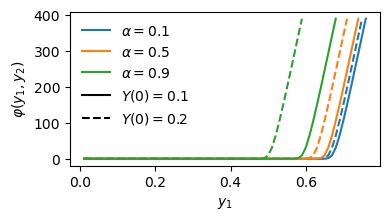

In [2]:
yrang = collect(0.01:0.01:1.)
fig,ax = subplots(figsize=(4,2))

σY = 0.01
α = 0.1
ax.plot(yrang,[φ_gaussian(y,0.1,σY,α) for y in yrang],"C0-",label = L"\alpha=0.1")
ax.plot(yrang,[φ_gaussian(y,0.2,σY,α) for y in yrang],"C0--")

α = 0.3
ax.plot(yrang,[φ_gaussian(y,0.1,σY,α) for y in yrang],"C1-",label = L"\alpha=0.5")
ax.plot(yrang,[φ_gaussian(y,0.2,σY,α) for y in yrang],"C1--")

α = 0.9
ax.plot(yrang,[φ_gaussian(y,0.1,σY,α) for y in yrang],"C2-",label = L"\alpha=0.9")
ax.plot(yrang,[φ_gaussian(y,0.2,σY,α) for y in yrang],"C2--")

ax.plot([0.3],[0.4],"k-",label=L"Y(0)=0.1")
ax.plot([0.3],[0.4],"k--",label=L"Y(0)=0.2")
ax.set_ylabel(L"\varphi(y_1,y_2)")
ax.set_xlabel(L"y_1")
ax.legend(frameon=false)
savefig(FIG_PATH*"/fig2_phi.pdf",bbox_inches="tight")
fig

# Load data from lineage and population simulations over a range of $a$ values

In [3]:
data_l = CSV.read("./data/fig2_data.csv",DataFrame);
data_p = CSV.read("./data/fig2_population_data.csv",DataFrame);


In [4]:

data_cells_l = combine(groupby(data_l,[:lineage,:cell]),
    :length => (x -> x[1]) => :M0,
    :length => (x -> x[end]) => :Mf,
    :x => (x -> mean(x)) => :xbar,
    :a => (x -> x[1]) => :a,
    :time => (x -> x[end] - x[1]) => :τ)
data_cells_l[:,:y0] .= log.(data_cells_l[:,:M0])
data_cells_l[:,:ϕ] .= log.(data_cells_l[:,:Mf] ./data_cells_l[:,:M0]);
arange = unique(data_l[:,:a]);



data_cells_p = combine(groupby(data_p,[:a,:branch_id]),
    :length => (x -> x[1]) => :M0,
    :length => (x -> x[end]) => :Mf,
    :x => (x -> mean(x)) => :xbar,
    :a => (x -> x[1]) => :a,
    :time => (x -> x[end] - x[1]) => :τ)
data_cells_p[:,:y0] .= log.(data_cells_p[:,:M0])
data_cells_p[:,:ϕ] .= log.(data_cells_p[:,:Mf] ./data_cells_p[:,:M0]);
arange = unique(data_p[:,:a]);

# Plot lineage statistics as a function of a

In [ ]:
cors_l= [cor(d.x,d.length) for d in groupby(data_l,:a)]
cors_p = [cor(d.x,d.length) for d in groupby(data_p,:a)]

fig,axs = subplots(figsize=(10,3),ncols=4)

ax = axs[0]
ax.plot(arange,cors_l,"+",fillstyle="none",label=L"lineage")
ax.plot(arange,cors_p,"+",fillstyle="none",label=L"population")
ax.plot(arange,zeros(length(arange)),"k--")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\hat{r}_{\lambda,M}")
#ax.legend(frameon=true)
#ax.set_ylim(-0.1,0.1)
ax.set_title("(A)",loc="left")
ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")

ax = axs[1]
alphas_l =  [-cov(d.ϕ,d.y0)/var(d.y0) for d in groupby(data_cells_l,:a)]
alphas_p =  [-cov(d.ϕ,d.y0)/var(d.y0) for d in groupby(data_cells_p,:a)]

ax.plot(arange,alphas_l,"+")
ax.plot(arange,alphas_p,"o",fillstyle="none")
# ax.plot(arange,ones(length(arange)),"k--",label="sizer")
ax.plot(arange,ones(length(arange))/2,"C7--",label="adder")
ax.legend(frameon=true)
#ax.set_ylim(0.3,0.6)
ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")


ax.set_title("(B)",loc="left")

ax = axs[2]
mu_l = [mean(d.length) for d in groupby(data_l,:a)]
std_l = [std(d.length) for d in groupby(data_l,:a)]
mu_p = [mean(d.length) for d in groupby(data_p,:a)]
std_p = [std(d.length) for d in groupby(data_p,:a)]
ax.plot(arange,mu_l,"C4-",fillstyle="none",label=L"\mu_M (lineage)")
ax.fill_between(arange,mu_l .-std_l,mu_l .+std_l,alpha=0.2,color="C4",label=L"\mu_M \pm \sigma_M (lineage)")
ax.plot(arange,mu_p,"C5-",fillstyle="none",label=L"\mu_M (population)")
ax.fill_between(arange,mu_p .-std_p,mu_p .+std_p,alpha=0.2,color="C5",label=L"\mu_M \pm \sigma_M (population)")
ax.set_xlabel(L"a")
ax.set_ylabel(L"M")
ax.legend(frameon=true)
ax.set_ylim(mu_l[1] - 3*std_l[1],mu_l[1] + 3*std_l[1])
ax.set_title("(C)",loc="left")

ax = axs[3]
mu_l = [mean(d.τ) for d in groupby(data_cells_l,:a)]
std_l = [std(d.τ) for d in groupby(data_cells_l,:a)]
mu_p = [mean(d.τ) for d in groupby(data_cells_p,:a)]
std_p = [std(d.τ) for d in groupby(data_cells_p,:a)]

ax.plot(arange,mu_l,"C5-",fillstyle="none",label=L"\mu_{\tau} (lineage)")
ax.fill_between(arange,mu_l .-std_l,mu_l .+ std_l,color="C5",alpha=0.2,label=L"\mu_{\tau} \pm \sigma_{\tau} (lineage)")
ax.plot(arange,mu_p,"C6-",fillstyle="none",label=L"\mu_{\tau} (population)")
ax.fill_between(arange,mu_p .-std_p,mu_p .+ std_p,color="C6",alpha=0.2,label=L"\mu_{\tau} \pm \sigma_{\tau} (population)")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\tau")
ax.set_title("(D)",loc="left")
ax.legend(frameon=true)
ax.set_ylim(mu_l[1] - 3*std_l[1],mu_l[1] + 3*std_l[1])
tight_layout()

savefig(FIG_PATH*"/Fig2.pdf",bbox_inches="tight")
fig

UndefVarError: UndefVarError: `mus_l` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

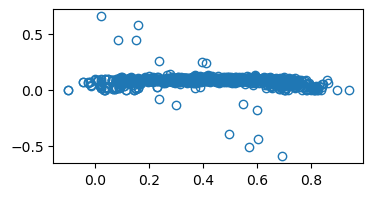

In [42]:
df = data_cells_p[data_cells_p.a .== 1.0,:]
fig,ax = subplots(figsize=(4,2))
ax.plot(df.y0,df.ϕ,"o",fillstyle="none")
fig

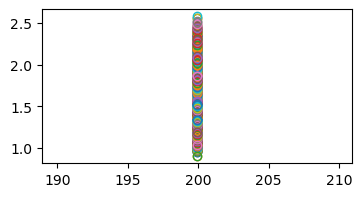

In [43]:
df = data_p[data_p.a .== 1.0,:]
fig,ax = subplots(figsize=(4,2))
for i in 1:length(df.branch_id)
    ax.plot(df.time_r[i],df.length[i],"o",fillstyle="none")
end
fig


# Population statistics


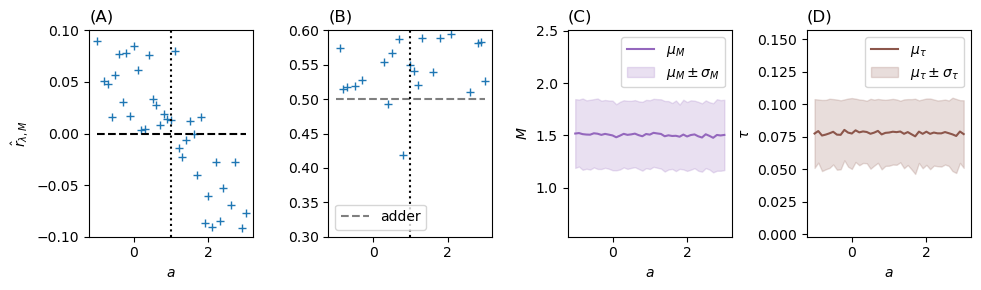

In [14]:
arange = collect(-1:0.1:3)
cors_OU_scaled = [cor(d.x,d.length) for d in groupby(data,:a)]
fig,axs = subplots(figsize=(10,3),ncols=4)

ax = axs[0]
ax.plot(arange,cors_OU_scaled,"+",fillstyle="none",label=L"\beta = \lambda\varphi")
ax.plot(arange,zeros(length(arange)),"k--")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\hat{r}_{\lambda,M}")
#ax.legend(frameon=true)
ax.set_ylim(-0.1,0.1)
ax.set_title("(A)",loc="left")
ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")

ax = axs[1]
alphas =  [-cov(d.ϕ,d.y0)/var(d.y0) for d in groupby(data_cells,:a)]
ax.plot(arange,alphas,"+")
# ax.plot(arange,ones(length(arange)),"k--",label="sizer")
ax.plot(arange,ones(length(arange))/2,"C7--",label="adder")
ax.vlines(0.5, ymin=-0.1, ymax=0.1, colors='k')
# ax.plot(arange,zeros(length(arange))/2,"C3--",label="timer")
# ax.set_ylabel("cell-size control parameter")
ax.legend(frameon=true)
ax.set_ylim(0.3,0.6)
ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")


ax.set_title("(B)",loc="left")

ax = axs[2]
mus = [mean(d.length) for d in groupby(data,:a)]
stds = [std(d.length) for d in groupby(data,:a)]
ax.plot(arange,mus,"C4-",fillstyle="none",label=L"\mu_M")
ax.fill_between(arange,mus .-stds,mus .+stds,alpha=0.2,color="C4",label=L"\mu_M \pm \sigma_M")
ax.set_xlabel(L"a")
ax.set_ylabel(L"M")
ax.legend(frameon=true)
ax.set_ylim(mus[1] - 3*stds[1],mus[1] + 3*stds[1])
ax.set_title("(C)",loc="left")

ax = axs[3]
gen_times_means = [mean(d.τ) for d in groupby(data_cells,:a)]
gen_times_stds = [std(d.τ) for d in groupby(data_cells,:a)]
ax.plot(arange,gen_times_means,"C5-",fillstyle="none",label=L"\mu_{\tau}")
ax.fill_between(arange,gen_times_means .-gen_times_stds,gen_times_means .+ gen_times_stds,color="C5",alpha=0.2,label=L"\mu_{\tau} \pm \sigma_{\tau}")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\tau")
ax.set_title("(D)",loc="left")
ax.legend(frameon=true)
ax.set_ylim(gen_times_means[1] - 3*gen_times_stds[1],gen_times_means[1] + 3*gen_times_stds[1])
tight_layout()

savefig(FIG_PATH*"/Fig2.pdf",bbox_inches="tight")
fig

# Simulations of model

In [53]:
dt = 0.01
τ =3
D = 0.01
σY = 0.05
σx = sqrt(D*τ)
α = 0.5
θ_OU = τ,D,α,σY,dt
θ_RG = σx,α,σY,dt
init = [0,1.,1]

num_cells = 45
num_lins = 1



data= make_lineages(generator_OU,init,θ_OU,num_cells,num_lins);
df = DataFrame(data,["time","x","length","cell", "lineage"]);
df = df[df.cell .> 10,:];
df.time = df.time .- df.time[1];
df.cell = df.cell .- minimum(df.cell);
df[:,:T] = cumsum(df.x)*mean(diff(df.time));
df_OU =df

data= make_lineages(generator_RG,init,θ_RG,num_cells,num_lins);
df = DataFrame(data,["time","x","length","cell", "lineage"]);
df = df[df.cell .> 10,:];
df.time = df.time .- df.time[1];
df.cell = df.cell .- minimum(df.cell);
df[:,:T] = cumsum(df.x)*mean(diff(df.time));
df_RG = df;

BoundsError: BoundsError: attempt to access NTuple{4, Float64} at index [5]

In [30]:
fig,axs = subplots(figsize=(6,4),nrows=2,sharex=true)
ax = axs[0]
ax.set_title("OU Model")
for cell in unique(df_OU.cell)
    df = df_OU[df_OU.cell .== cell,:]
    ax.plot(df.time,df.x,"C0")
    ax.plot(df.time,df.length/0.7,"C1")
end
ax.set_ylabel(L"M\text{ and }x")
#ax.plot(df_OU.time,df_OU.x,"C0",alpha=0.3)

ax = axs[1]
ax.set_title("RGR Model")
ax.plot(df_RG.time,df_RG.x,"C0",alpha=0.4)
for cell in unique(df_RG.cell)
    df = df_RG[df_RG.cell .== cell,:]
    ax.plot(df.time,df.x,"C0")
    ax.plot(df.time,df.length/0.7,"C1")
end
ax.set_ylabel(L"M\text{ and }x")
ax.set_xlabel("time")



savefig(FIG_PATH*"/OU_vs_RGR.pdf",bbox_inches="tight")
fig



UndefVarError: UndefVarError: `df_RG` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Plots with different growth rate variability

In [31]:
num_cells = 4000
data_all = []
τrange = collect(0.01:0.05:3)
for i in 1:length(τrange)
    θ_OU = τrange[i],D,α,σY,dt
    data= make_lineages(generator_OU,init,θ_OU,num_cells,num_lins);
    df = DataFrame(data,["time","x","length","cell", "lineage"]);
    df = df[df.cell .> 10,:];
    df.time = df.time .- df.time[1];
    df.cell = df.cell .- minimum(df.cell);
    df[:,:T] = cumsum(df.x)*mean(diff(df.time));
    df[:,:lineage] = ones(length(df.time))*i 
    push!(data_all,df)
end
data_OU_l = vcat(data_all...);

data_all = []
for i in 1:length(τrange)
    σx = sqrt(D*τrange[i])
    θ_RG = σx,α,σY,dt
    data= make_lineages(generator_RG,init,θ_RG,num_cells,num_lins);
    df = DataFrame(data,["time","x","length","cell", "lineage"]);
    df = df[df.cell .> 10,:];
    df.time = df.time .- df.time[1];
    df.cell = df.cell .- minimum(df.cell);
    df[:,:T] = cumsum(df.x)*mean(diff(df.time));
    df[:,:lineage] = ones(length(df.time))*i 
    push!(data_all,df)
end
data_RG_l = vcat(data_all...);

BoundsError: BoundsError: attempt to access NTuple{4, Float64} at index [5]

In [32]:

covs_OU_l = [cor(d.x,d.length) for d in groupby(data_OU_l,:lineage)]
covs_RG_l = [cor(d.x,d.length) for d in groupby(data_RG_l,:lineage)]
τrange = collect(0.01:0.05:3)
fig,ax = subplots(figsize=(2,2))
ax.plot(τrange,covs_OU_l,"-")
ax.plot(τrange,covs_RG_l,"-",fillstyle="none")
ax.set_xlabel(L"\sigma_{\lambda}^2")
#ax.set_ylim(-0.005,0.005)
fig

UndefVarError: UndefVarError: `data_RG_l` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [33]:
fig,axs = subplots(figsize=(5,2),ncols=2,sharey=true)

ax = axs[0]
ax.set_title("OU Model")
lrange = collect(0.8:0.1:3)
for l in unique(data_OU_l.lineage)
    df = data_OU_l[data_OU_l.lineage .== l,:]
    cdf = [length(df.length[df.length .> l]) for l in lrange]/length(df.length)
    ax.plot(lrange,cdf,"-",alpha=0.4)
    #ax.fill_between(lrange,cdf,0,alpha=0.01)
end
ax.set_ylabel(L"P(size > y)")

ax = axs[1]
ax.set_title("RG Model")
lrange = collect(0.8:0.1:3)
for l in unique(data_RG_l.lineage)
    df = data_RG_l[data_RG_l.lineage .== l,:]
    cdf = [length(df.length[df.length .> l]) for l in lrange]/length(df.length)
    ax.semilogy(lrange,cdf,"-",alpha=0.4)
    #ax.fill_between(lrange,cdf,0,alpha=0.01)
end

# cdf = [length(df.length[df.length .> l]) for l in lrange]/length(df.length)
# ax.plot(lrange,cdf,"-",label=L"length")
ax.set_xlabel("y")

#ax.legend(frameon=true)

savefig(FIG_PATH*"/size_dist.pdf",bbox_inches="tight")
fig

UndefVarError: UndefVarError: `data_RG_l` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [34]:
function get_attime(root,tmax)
    label = root.label
    times =label[:,1]
    if length(label[times .< tmax,2]) == 0
        return zeros(length(label[1,:]))
    end
    label =  label[times .< tmax,:]
    return label[end,:]
end
Tmax_tree = 9

function terminate(cell)
    cell.label[end,1]>Tmax_tree
end

τrange = collect(0.01:0.05:1)
data_OU = []
for i in 1:length(τrange)
    θ_OU = τrange[i],D,α,σY,dt
    root = create_cell(generator_OU(init,θ_OU))
    grow_tree!(root,terminate,θ_OU,generator_OU)
    pop = hcat([get_attime(cell,Tmax_tree) for cell in get_leaf_nodes(root)]...);
    #pop = pop[pop .!= zeros(3)];
    push!(data_OU,pop)
end
data_OU_p = data_OU

data_RG = []
for i in 1:length(τrange)
    σx = D*τrange[i]*4
    θ_RG = σx,α,σY,dt
    root = create_cell(generator_RG(init,θ_RG))
    grow_tree!(root,terminate,θ_RG,generator_RG)
    pop = hcat([get_attime(cell,Tmax_tree) for cell in get_leaf_nodes(root)]...);
    #pop = pop[pop .!= zeros(3)];
    push!(data_RG,pop)
end
data_RG_p = data_RG




InterruptException: InterruptException:

In [35]:
rho_OU_λY = [cor(data'[:,2][data'[:,3] .> 0],log.(data'[:,3][data'[:,3] .> 0])) for data in data_OU_p]
rho_OU_λM = [cor(data'[data'[:,3] .> 0,:])[2,3]  for data in data_OU_p]

rho_RG_λY = [cor(data'[:,2][data'[:,3] .> 0],log.(data'[:,3][data'[:,3] .> 0])) for data in data_RG_p]
rho_RG_λM = [cor(data'[data'[:,3] .> 0,:])[2,3]  for data in data_RG_p]


# covs_RG_λY = [cov(data'[:,2][data'[:,3] .> 0],log.(data'[:,3][data'[:,3] .> 0])) for data in data_RG]
# covs_RG_λM = [cov(data')[2,3]  for data in data_RG]



fig,ax = subplots(figsize=(2,2))
ax.plot(τrange,rho_OU_λY,"-",label="OU")
ax.plot(τrange,rho_RG_λY,"-",fillstyle="none",label="RGR")
ax.set_xlabel(L"\sigma_{\lambda}^2")
ax.set_ylim(-0.1,0.5)
fig

UndefVarError: UndefVarError: `data_OU_p` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [36]:
gr_func = x-> mean(x[:,2].*x[:,3])/mean(x[:,3])
LM_OU = [gr_func(data'[data'[:,3] .> 0,:]) for data in data_OU_p]
LM_RG = [gr_func(data'[data'[:,3] .> 0,:]) for data in data_RG_p]

fig,ax = subplots(figsize=(4,2))
ax.plot(τrange,LM_OU,"C1-",label="OU")
ax.plot(τrange,LM_RG,"C2-",label="RG")
fig

UndefVarError: UndefVarError: `data_OU_p` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Plots with different $\alpha$

In [37]:

Tmax_tree = 6

function terminate(cell)
    cell.label[end,1]>Tmax_tree
end

αrange = collect(0.01:0.02:1)
data_OU = []
for i in 1:length(αrange)
    θ_OU = τ,D,αrange[i],σY,dt
    root = create_cell(generator_OU(init,θ_OU))
    grow_tree!(root,terminate,θ_OU,generator_OU)
    pop = hcat([get_attime(cell,Tmax_tree) for cell in get_leaf_nodes(root)]...);
    #pop = pop[pop .!= zeros(3)];
    push!(data_OU,pop)
end
data_OU_p_α = data_OU

data_RG = []
for i in 1:length(αrange)
    
    θ_RG = σx,αrange[i],σY,dt
    root = create_cell(generator_RG(init,θ_RG))
    grow_tree!(root,terminate,θ_RG,generator_RG)
    pop = hcat([get_attime(cell,Tmax_tree) for cell in get_leaf_nodes(root)]...);
    #pop = pop[pop .!= zeros(3)];
    push!(data_RG,pop)
end
data_RG_p_α = data_RG


BoundsError: BoundsError: attempt to access NTuple{4, Float64} at index [5]

In [38]:
gr_func = x-> mean(x[:,2].*x[:,3])/mean(x[:,3])
LM_OU = [gr_func(data'[data'[:,3] .> 0,:]) for data in data_OU_p_α]
LM_RG = [gr_func(data'[data'[:,3] .> 0,:]) for data in data_RG_p_α]

fig,ax = subplots(figsize=(4,2))
ax.plot(αrange,LM_OU,"C1-",label="OU")
ax.plot(αrange,LM_RG,"C2-",label="OU")
fig

UndefVarError: UndefVarError: `data_RG_p_α` not defined in `Main`
Suggestion: check for spelling errors or missing imports.